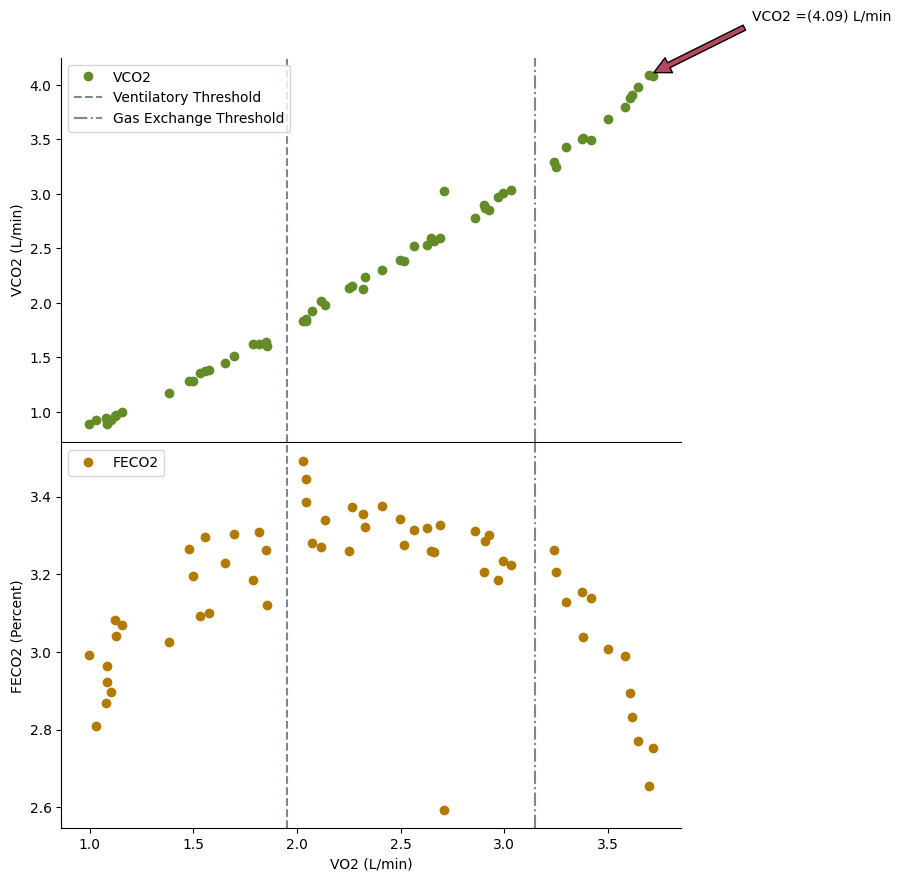

In [4]:
# Importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read file
df = pd.read_csv('/kaggle/input/subject-1432-csv/subject_1432.csv', header=[0], skiprows=[1, 2, 3])

# Rename headers
df = df.rename(columns={'# METS':'METS', '# RER':'RER'})

# Simplified names
x = df['VO2']
y = df['VCO2']
y1 = (df['VCO2'] / df['VE']) * 100

# Max values
ymax = max(y)
xmax = x[y.argmax()]

# Define VT and GET
VT = 1.95
GET = 3.15

# Subplot of VCO2
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 10))
ax[0].annotate('VCO2 =({}) L/min'.format(round(ymax, 2)),xy=(xmax, ymax), xytext=(xmax+.5, ymax+.5), 
               arrowprops=dict(facecolor='xkcd:dark rose', shrink=0.05),)
ax[0].plot(x, y, 'o', label=('VCO2'), c='xkcd:mossy green')
ax[0].axvline(x=VT, color='xkcd:bluish grey', linestyle='--',label='Ventilatory Threshold')
ax[0].axvline(x=GET, color='xkcd:bluish grey', linestyle='-.',label='Gas Exchange Threshold')
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].set(ylabel='VCO2 (L/min)')
ax[0].legend(loc='upper left')

# Subplot of FECO2
ax[1].plot(x, y1, 'o', label=('FECO2'), c='xkcd:golden brown')
ax[1].axvline(x=VT, color='xkcd:bluish grey', linestyle='--', label='_nolegend_')
ax[1].axvline(x=GET, color='xkcd:bluish grey', linestyle='-.', label='_nolegend_')
ax[1].spines[['right', 'top']].set_visible(False)
ax[1].set(ylabel=('FECO2 (Percent)'))
ax[1].set(xlabel=('VO2 (L/min)'))
ax[1].legend(loc='upper left')

# Adjusting space between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.004)

# Shows figure
fig.savefig("VCO2-FECO2-VO2,png", dpi=300, bbox_inches='tight')
fig.show()